In [89]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('yield_df.csv')

In [91]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,1,Argentina,Cassava,1990,100000,591,26156.0,17.46
1,2,Argentina,Cassava,1990,100000,591,26156.0,17.67
2,3,Argentina,Maize,1990,34608,591,26156.0,17.46
3,4,Argentina,Maize,1990,34608,591,26156.0,17.67
4,5,Argentina,Potatoes,1990,202747,591,26156.0,17.46


In [92]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [93]:
df.shape

(16561, 7)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16561 entries, 0 to 16560
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           16561 non-null  object 
 1   Item                           16561 non-null  object 
 2   Year                           16561 non-null  int64  
 3   hg/ha_yield                    16561 non-null  int64  
 4   average_rain_fall_mm_per_year  16561 non-null  int64  
 5   pesticides_tonnes              16561 non-null  float64
 6   avg_temp                       16561 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 905.8+ KB


In [95]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [96]:
df.duplicated().sum()

1212

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
df.duplicated().sum()

0

# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [99]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [100]:
df = df.drop(to_drop)

In [101]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Argentina,Cassava,1990,100000,591,26156.00,17.46
1,Argentina,Cassava,1990,100000,591,26156.00,17.67
2,Argentina,Maize,1990,34608,591,26156.00,17.46
3,Argentina,Maize,1990,34608,591,26156.00,17.67
4,Argentina,Potatoes,1990,202747,591,26156.00,17.46
...,...,...,...,...,...,...,...
16556,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
16557,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
16558,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
16559,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [102]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [103]:
len(df['Area'].unique())

51

C:\Users\shobh\AppData\Local\Temp\ipykernel_10008\1943416860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'],palette="viridis")


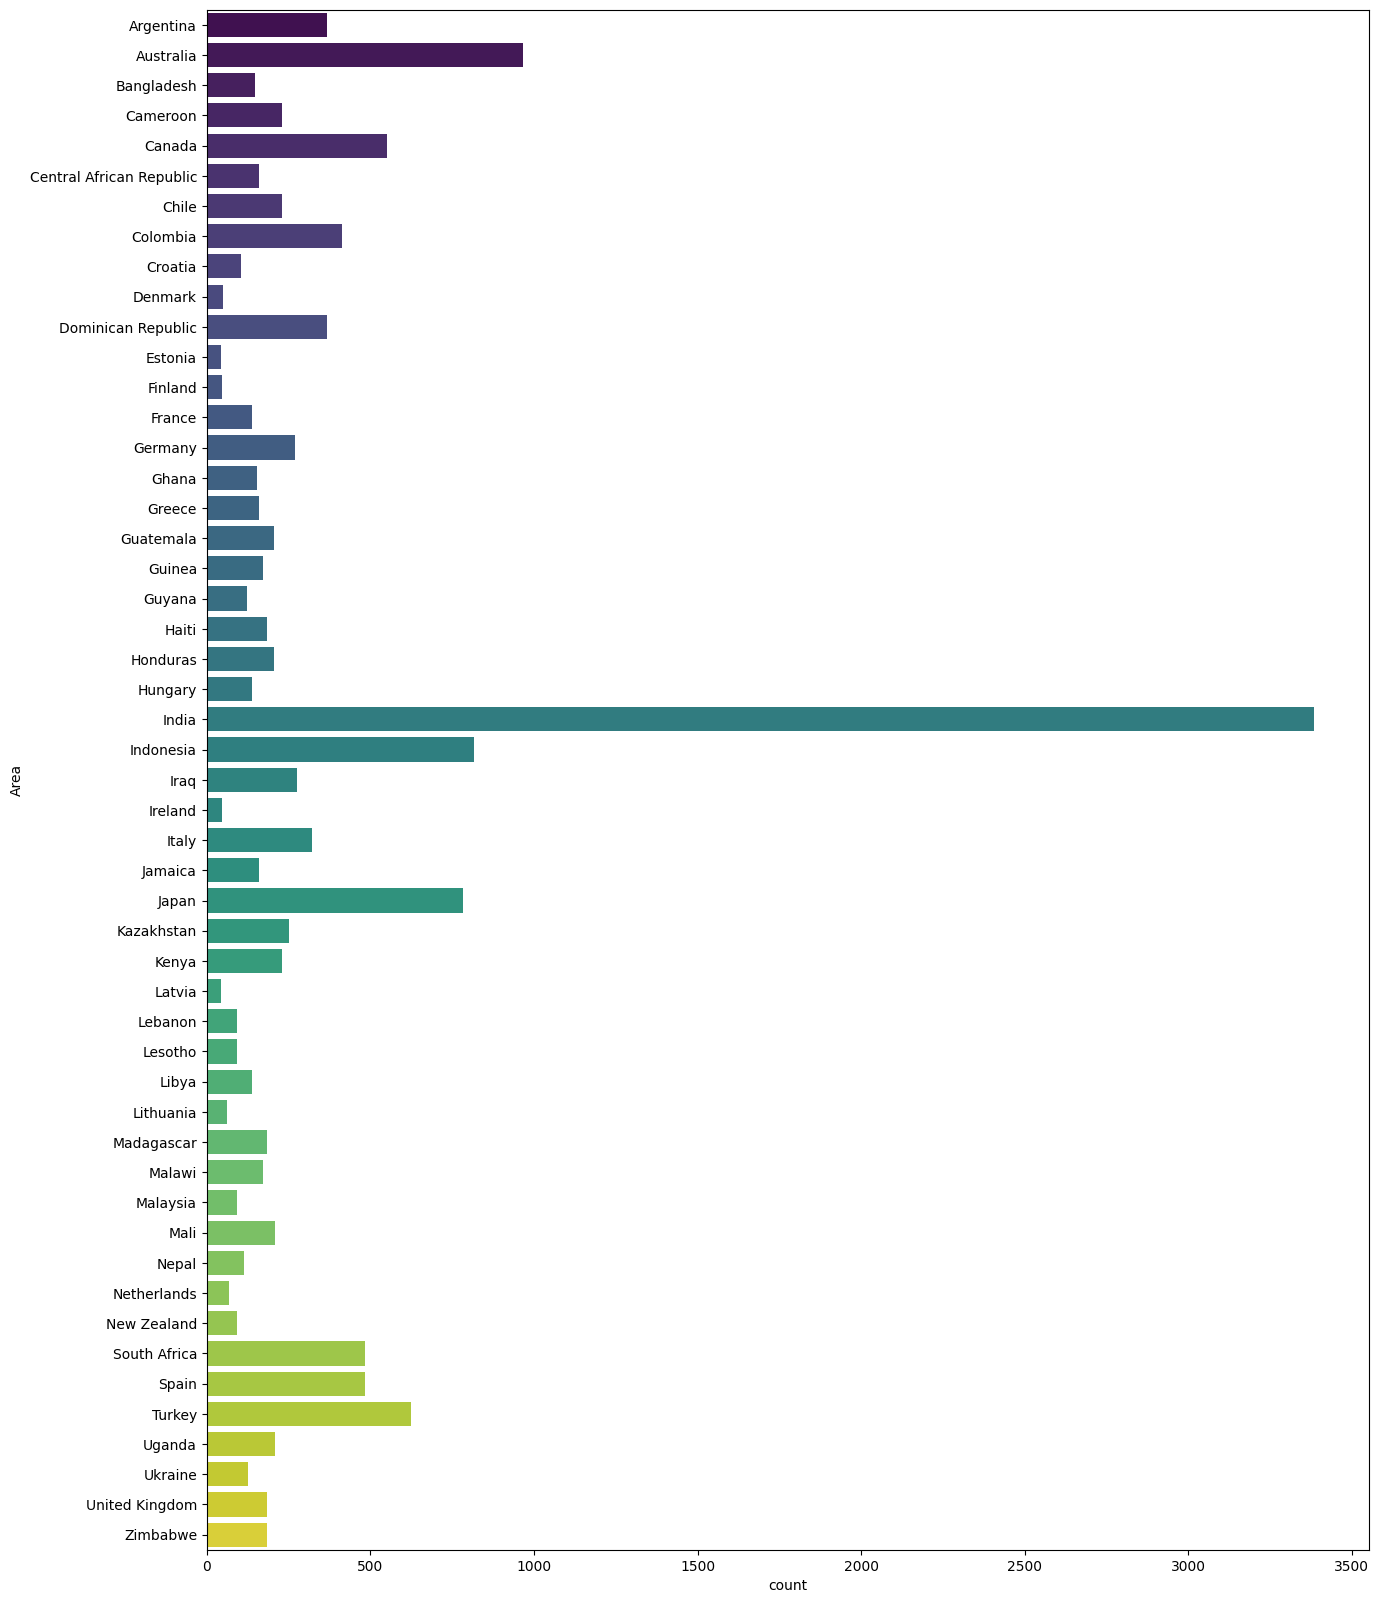

In [88]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'],palette="viridis")
plt.show()

In [104]:
(df['Area'].value_counts() < 500).sum()

45

# yield_per_country

In [105]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [106]:
df['hg/ha_yield'].sum()

1274243096

In [107]:
yield_per_country

[32864032,
 109111062,
 7720159,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4113713,
 14086433,
 17657728,
 30999849,
 46773540,
 52263950,
 7494314,
 5496901,
 44335992,
 7408629]

# Yield Per Country Graph

C:\Users\shobh\AppData\Local\Temp\ipykernel_10008\3163133648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country, x=yield_per_country,palette="viridis")


<Axes: >

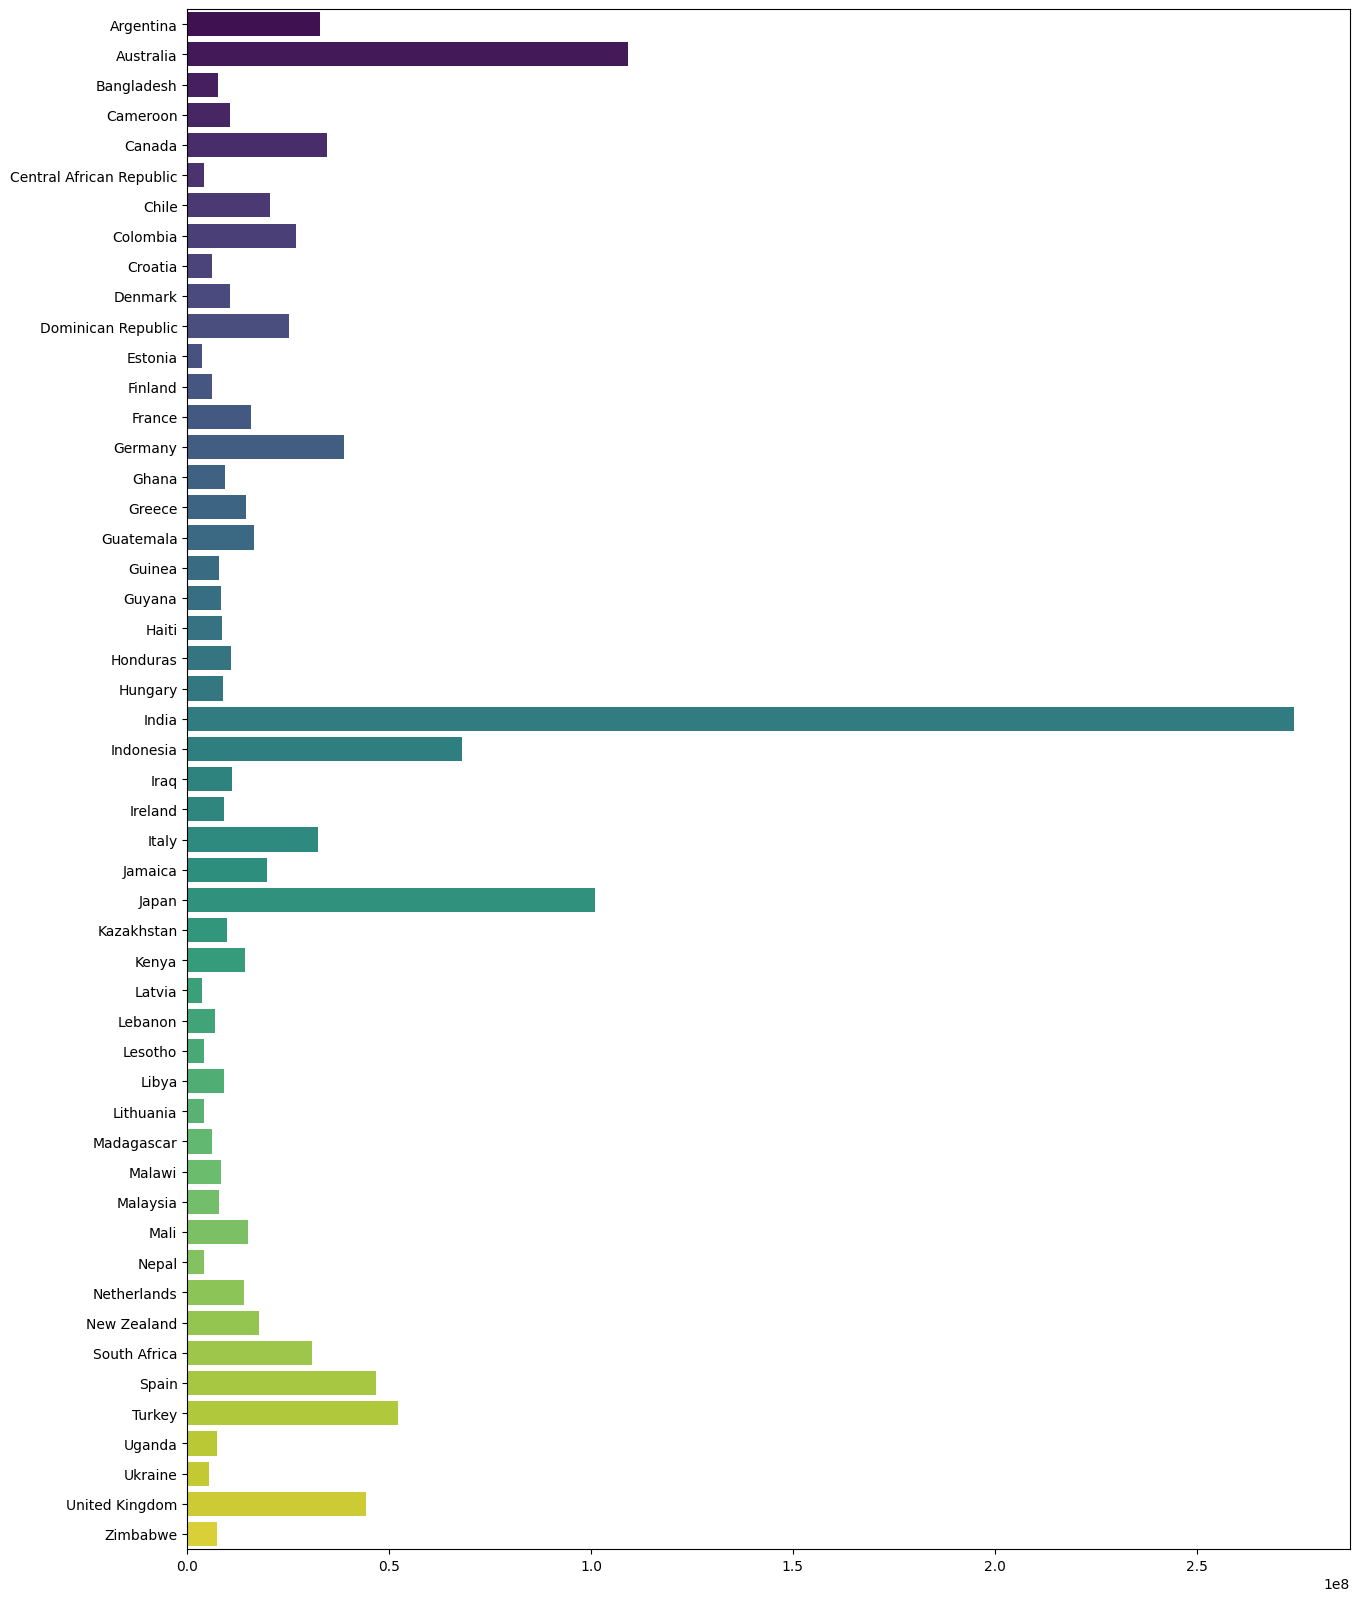

In [109]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country,palette="viridis")

# Graph Frequency vs Item

C:\Users\shobh\AppData\Local\Temp\ipykernel_10008\925099609.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Item'], palette="viridis")


<Axes: xlabel='count', ylabel='Item'>

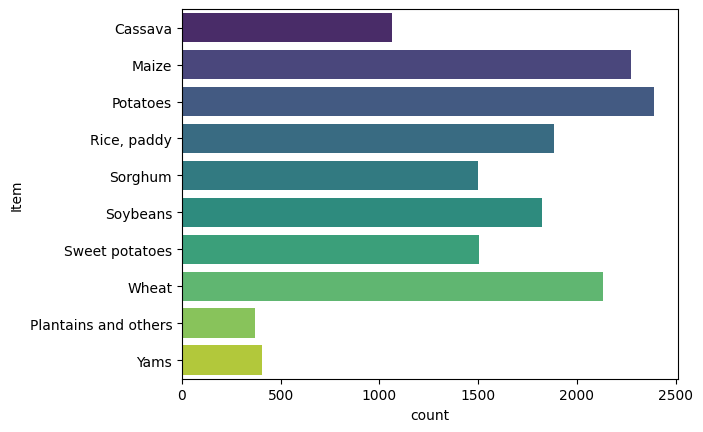

In [129]:
sns.countplot(y=df['Item'], palette="viridis")

# Yield Vs Item

In [111]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

C:\Users\shobh\AppData\Local\Temp\ipykernel_10008\2888223948.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crops,x=yield_per_crop,palette="viridis")


<Axes: >

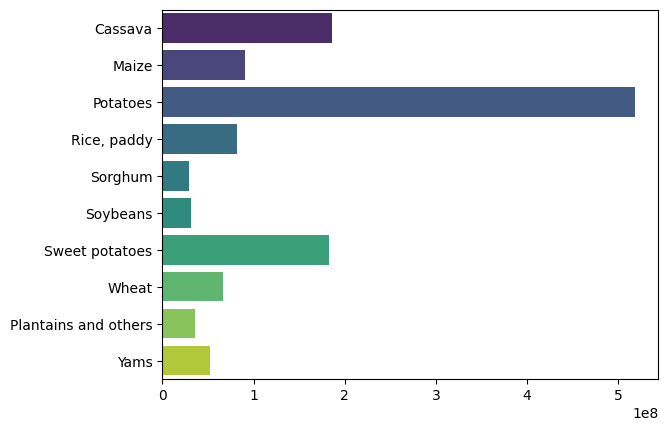

In [112]:
sns.barplot(y=crops,x=yield_per_crop,palette="viridis")

# Train Test split Rearranging Columns

In [114]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [115]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,591.0,26156.0,17.46,Argentina,Cassava,100000
1,1990,591.0,26156.0,17.67,Argentina,Cassava,100000
2,1990,591.0,26156.0,17.46,Argentina,Maize,34608


In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [118]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [29]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Training Our Model

In [128]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# used mutiple models to check best algorithm
models = {
    'Linear Regression':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge Regression':Ridge(),
    'KNN':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name}  = Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} R-Score : {r2_score(y_test,y_pred)}")

Linear Regression  = Mean Absolute Error : 32162.5275424598 R-Score : 0.7619905906927735


C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147674807624.96875, tolerance: 10597296342.558186
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso Regression  = Mean Absolute Error : 32151.389794274775 R-Score : 0.7619965037037215
Ridge Regression  = Mean Absolute Error : 32103.0827386523 R-Score : 0.7618517970510661
KNN  = Mean Absolute Error : 4173.492182410423 R-Score : 0.9867464688570997
Decision Tree  = Mean Absolute Error : 3646.9931596091205 R-Score : 0.9837098222423589


# Using KNN as our model

In [120]:
dtr = KNeighborsRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([111084.6, 304978. ,  80517.2, ...,  15151.4,   8222. ,  10108.6])

# Crop Yield Prediction System

In [140]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)
    transformed_features = preprocesser.transform(features)
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

# Use your inputs over here to get a prediction of estimated yield.
Year = 2012
average_rain_fall_mm_per_year =1083.0
pesticides_tonnes = 52980.00
avg_temp = 25.3                  
Area = 'India'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print("Estimated Total Crop Yield:(hg/ha) ",result[0])


Estimated Total Crop Yield:(hg/ha)  25557.0


C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


# Pickle Files

In [35]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [36]:
import sklearn
print(sklearn.__version__)

1.5.2
